# Prerequisites

Imported Dataset from Google Drive 👇



In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Imported all required libraries 👇

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

print(tf.__version__)

2.12.0


Generated Data 👇

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Dataset/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 128,
    image_size=(256,256),
    shuffle=True,
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Dataset/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 128,
    image_size=(256,256),
    shuffle=True,
)

Found 4476 files belonging to 2 classes.
Found 497 files belonging to 2 classes.


Normalized Data 👇

In [ ]:
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# Making the CNN Model

In [ ]:
from keras import layers

model = keras.Sequential([
    # Input layer
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D(pool_size=(2, 2), strides = 2),
    layers.Dropout(0.25),

    # Hidden layer 1
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides = 2),
    layers.Dropout(0.25),

    # Hidden layer 2
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides = 2),
    layers.Dropout(0.25),

    # Flatten the output from convolutional layers
    layers.Flatten(),

    # Dense layer 1
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),

    # Dense layer 2
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),

    # Output layer
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 64)        0

In [ ]:
opt = keras.optimizers.RMSprop(
    learning_rate=0.001
)

model.compile(
    optimizer=opt,
    loss ='binary_crossentropy',
    metrics = ['accuracy']
)

# Training our Model

Checkpoint for Early Stopping 👇

In [ ]:
from keras.callbacks import EarlyStopping

callback = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.00001,
    patience = 20,
    mode = 'auto',
    verbose = 1,
    baseline = None,
    restore_best_weights = False
)

Training the model 👇

In [ ]:
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs = 100,
    callbacks=[callback]
  )

Epoch 1/100
35/35 [==============================] - 577s 13s/step - loss: 1.1339 - accuracy: 0.5626 - val_loss: 0.6415 - val_accuracy: 0.6781
Epoch 2/100
35/35 [==============================] - 20s 534ms/step - loss: 0.6337 - accuracy: 0.6734 - val_loss: 0.5136 - val_accuracy: 0.7666
Epoch 3/100
35/35 [==============================] - 19s 493ms/step - loss: 0.5278 - accuracy: 0.7480 - val_loss: 0.4784 - val_accuracy: 0.7948
Epoch 4/100
35/35 [==============================] - 20s 532ms/step - loss: 0.4375 - accuracy: 0.7985 - val_loss: 0.5294 - val_accuracy: 0.7203
Epoch 5/100
35/35 [==============================] - 19s 485ms/step - loss: 0.4589 - accuracy: 0.8000 - val_loss: 0.4359 - val_accuracy: 0.8028
Epoch 6/100
35/35 [==============================] - 20s 522ms/step - loss: 0.3875 - accuracy: 0.8289 - val_loss: 0.3133 - val_accuracy: 0.8934
Epoch 7/100
35/35 [==============================] - 19s 482ms/step - loss: 0.3392 - accuracy: 0.8588 - val_loss: 0.2892 - val_accuracy: 

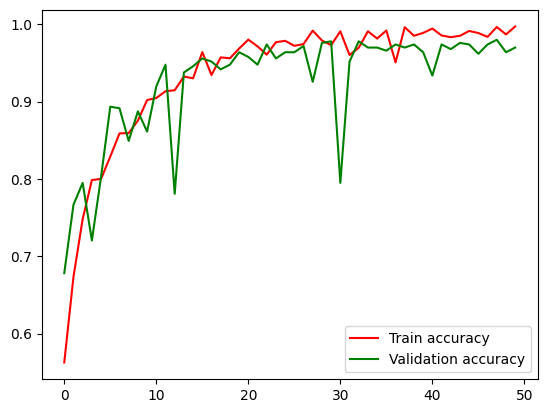

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='Train accuracy')
plt.plot(history.history['val_accuracy'],color='green',label='Validation accuracy')

plt.legend()
plt.show()

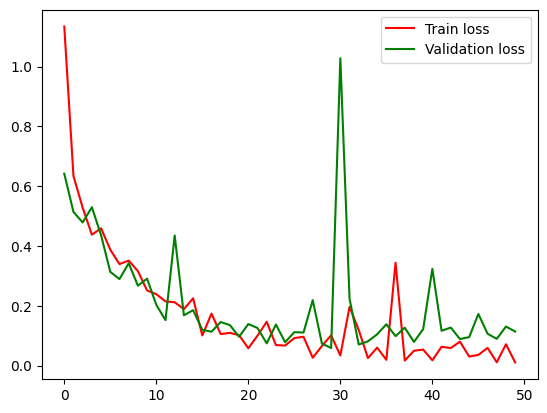

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='Train loss')
plt.plot(history.history['val_loss'],color='green',label='Validation loss')

plt.legend()
plt.show()

In [ ]:
#Saving the model to a file

filename = input("Enter a filename: ")

model.save(f'/content/drive/MyDrive/Dataset/{filename}.h5')

Enter a filename: apple_cherry_1


# Testing our Model

In [ ]:
#Loading the model from saved file

from keras.models import Model, load_model

model = load_model('/content/drive/MyDrive/Dataset/only_apple.h5')

Enter image file path: /content/drive/MyDrive/Dataset/test/unhealthy/Apple___Apple_scab (559).JPG
1/1 [==============================] - 0s 21ms/step
Predicted: Un-Healthy [1.0]


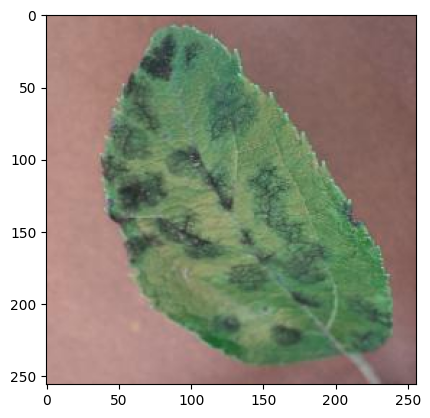

In [ ]:
import cv2
import matplotlib.pyplot as plt

filepath = input("Enter image file path: ")

test_img = cv2.imread(filepath)

plt.imshow(test_img)

test_img = cv2.resize(test_img,(256,256))

test_input = test_img.reshape((1,256,256,3))

result = model.predict(test_input)[0][0]

if result == 0.0:
  print(f'Predicted: Healthy [{result}]')
else:
  print(f'Predicted: Un-Healthy [{result}]')